In [1]:
import ee 
import folium
import geehydro
from datetime import datetime as dt
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Autheticate and then initialize the session using your credentials
#ee.Authenticate()
ee.Initialize()

# A simple example that retrives a time series of a satellite image set and visualizes it

Note: While the image set corresponds to a time series progression, it is not clear what the time stamp of a particular image is

In [14]:
## Define your image collection 
collection = ee.ImageCollection('LANDSAT/LC8_L1T_TOA')

## Define time range and filter the data
collection_time = collection.filterDate('2010-01-01', '2018-01-01') #YYYY-MM-DD

## Select location based on location of tile
path = collection_time.filter(ee.Filter.eq('WRS_PATH', 198))
pathrow = path.filter(ee.Filter.eq('WRS_ROW', 24))

## Select imagery with less then 5% of image covered by clouds
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 10))

## Select bands
bands = clouds.select(['B4', 'B5', 'B6'])


## Retrieve a list of the images
collectionList = bands.toList(bands.size()) # Converts the image collection to a list accessible via index
collectionSize = collectionList.size().getInfo()

print('='*100)
print('The number of items in this collection: ', collectionSize)
print('='*100)

# Define the region of interest
ROI = ee.Geometry.Rectangle([5.727906, 51.993435,
                                   5.588144, 51.944356])

# Choose a specific image from the collection List
indx = 0

image = ee.Image(collectionList.get(indx))

parameters = {'min': 0,
              'max': 0.5,
              'bands': ['B4', 'B5', 'B6'],
              'region': ROI }

# Plot the satellite image
Image(url = image.getThumbUrl(parameters))

The number of items in this collection:  16


# Having visualized the image, we now show how to convert it into a Numpy array so that we can manipulate the image

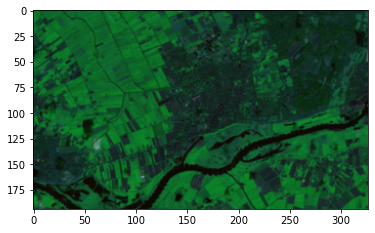

In [17]:
# Now that we have a specific image from the list, we convert it to a numpy array

indx = 15

# Retrieve the specific image
image = ee.Image(collectionList.get(indx))#

# Define an area of interest.
aoi = ee.Geometry.Polygon([[[5.588144,51.993435], [5.727906, 51.993435],[5.727906, 51.944356],[5.588144, 51.944356]]], None, False)

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = image.sampleRectangle(region=aoi)

# Get individual band arrays.
band_arr_b4 = band_arrs.get('B4')
band_arr_b5 = band_arrs.get('B5')
band_arr_b6 = band_arrs.get('B6')

# Transfer the arrays from server to client and cast as np array.
np_arr_b4 = np.array(band_arr_b4.getInfo())
np_arr_b5 = np.array(band_arr_b5.getInfo())
np_arr_b6 = np.array(band_arr_b6.getInfo())

# Expand the dimensions of the arrays
np_arr_b4 = np.expand_dims(np_arr_b4, 2)
np_arr_b5 = np.expand_dims(np_arr_b5, 2)
np_arr_b6 = np.expand_dims(np_arr_b6, 2)

# Stack the individual bands to make a 3-D array.
rgb_img = np.concatenate((np_arr_b4, np_arr_b5, np_arr_b6), 2)

# Plot the array
plt.imshow(rgb_img)
plt.show()